In [1]:
from HH_minimal_cells import Fast_Spiking,Intrinsic_Bursting
from neuron import h,gui
import matplotlib.pyplot as plt
h.load_file("stdrun.hoc")

1.0

In [2]:
cell=Intrinsic_Bursting(0,0,0,0,0,1)
h.topology()
cell.soma.psection()


|-|       Intrinsically Bursting[0].soma(0-1)



{'point_processes': {'ExpSyn': {ExpSyn[0]}},
 'density_mechs': {'pas': {'g': [1e-05], 'e': [-85.0], 'i': [0.0]},
  'extracellular': {'xraxial': [[1000000000.0, 1000000000.0]],
   'xg': [[1000000000.0, 1000000000.0]],
   'xc': [[0.0, 0.0]],
   'e': [0.0],
   'i_membrane': [0.0],
   'vext': [[0.0, 0.0]]},
  'cad': {'depth': [1.0],
   'taur': [5.0],
   'cainf': [0.00024],
   'kt': [0.0],
   'kd': [0.0]},
  'hh2': {'gnabar': [0.05],
   'gkbar': [0.005],
   'vtraub': [-55.0],
   'm_inf': [0.0],
   'h_inf': [0.0],
   'n_inf': [0.0],
   'tau_m': [0.0],
   'tau_h': [0.0],
   'tau_n': [0.0],
   'm_exp': [0.0],
   'h_exp': [0.0],
   'n_exp': [0.0],
   'm': [0.0],
   'h': [0.0],
   'n': [0.0]},
  'ical': {'gcabar': [0.00017],
   'carev': [0.0],
   'alpha_m': [0.0],
   'beta_m': [0.0],
   'alpha_h': [0.0],
   'beta_h': [0.0],
   'm': [0.0],
   'h': [0.0]},
  'im': {'gkbar': [3e-05], 'm_inf': [0.0], 'tau_m': [0.0], 'm': [0.0]}},
 'ions': {'na': {'ena': [50.0],
   'nai': [10.0],
   'nao': [140.0],
 

In [3]:
# Insert electrode
from test_electrode import stim_test
stim, simtime=stim_test(cell)

In [4]:
# # Transient Time
# trans = 0000


# # setup simulation parameters
# Dt = 0.1			# macroscopic time step <<>>
# npoints = 10000

h.dt = 0.1			# must be submultiple of Dt
# #tstart = trans
# h.tstop = trans + npoints * Dt
# h.steps_per_ms = 5
h.celsius = 36
# h.v_init = -70



In [5]:
# Record v membrane
v=h.Vector().record(cell.soma(0.5)._ref_v)
t=h.Vector().record(h._ref_t)


In [6]:
h.finitialize(cell.v_init)
h.continuerun(simtime)


0.0

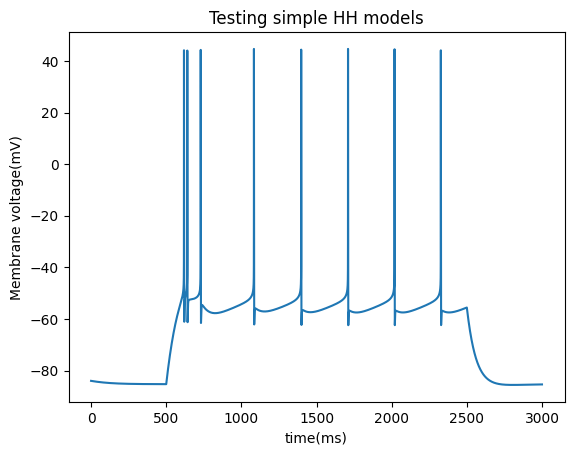

: 

In [ ]:
plt.Figure()
plt.plot(t,v)
plt.xlabel("time(ms)")
plt.ylabel("Membrane voltage(mV)")
plt.title("Testing simple HH models")
plt.show()

Vector[3]
[325.9000000001398, 333.50000000014154, 340.8000000001432, 348.3000000001449, 356.00000000014666, 364.2000000001485, 372.60000000015043, 381.3000000001524, 390.4000000001545, 399.90000000015664, 409.70000000015887, 419.9000000001612, 430.70000000016364, 441.70000000016614, 453.0000000001687, 464.70000000017137, 477.00000000017417, 489.400000000177, 502.00000000017985, 515.1000000001793, 528.5000000001671, 542.0000000001548, 555.6000000001425, 569.30000000013, 583.2000000001174, 597.4000000001045, 611.5000000000916, 626.0000000000784, 640.6000000000652, 655.100000000052, 669.9000000000385, 684.700000000025, 699.6000000000115]
88.30612791011863


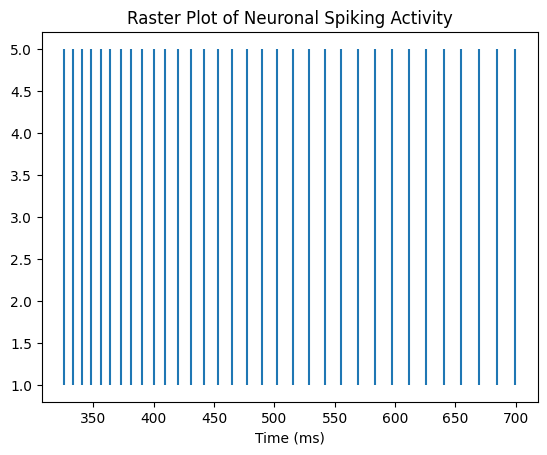

In [8]:
print(cell.spike_times)
spiketimes = cell.spike_times.to_python()
plt.Figure()
plt.vlines(spiketimes,1,5)
plt.xlabel('Time (ms)')
plt.title('Raster Plot of Neuronal Spiking Activity')

print(spiketimes)
time=spiketimes[-1]-spiketimes[0]
freq=len(spiketimes)/time*1000
print(freq)